In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.


## Run Notebook (Datasets Builder.ipynb) first which will create training_data and validation_data folder 

In [2]:
IMG_DIM = (150, 150)
## For windows separator is "\\" and for OSX the saparator is "/"
separator = "/"

In [3]:
train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split(separator)[1].split('.')[0].strip() for fn in train_files]

print('Train dataset shape:', train_imgs.shape)

Train dataset shape: (2916, 150, 150, 3)


In [4]:
## Test code for split separator
train_files[0].split('/')[1].split('.')[0]

'cat'

In [5]:
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split(separator)[1].split('.')[0].strip() for fn in validation_files]

print('Validation dataset shape:', validation_imgs.shape)

Validation dataset shape: (987, 150, 150, 3)


In [6]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (2916, 150, 150, 3) 	Validation dataset shape: (987, 150, 150, 3)


In [7]:
train_labels

['cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',


In [8]:
validation_labels

['cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',


In [9]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


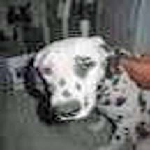

In [10]:
print(train_imgs[1].shape)
array_to_img(train_imgs[2])

In [11]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat'] [1 0 1 0 1 0 1 1 1 0]


In [12]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________

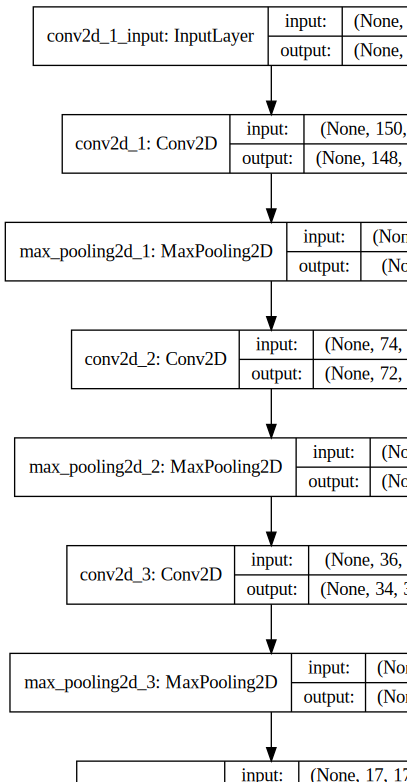

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [14]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Train on 2916 samples, validate on 987 samples
Epoch 1/30
2916/2916 [==============================] - 43s 15ms/step - loss: 0.9689 - accuracy: 0.5291 - val_loss: 0.7652 - val_accuracy: 0.4995
Epoch 2/30
2916/2916 [==============================] - 44s 15ms/step - loss: 0.6724 - accuracy: 0.6180 - val_loss: 0.6754 - val_accuracy: 0.6424
Epoch 3/30
2916/2916 [==============================] - 43s 15ms/step - loss: 0.5661 - accuracy: 0.7027 - val_loss: 0.6881 - val_accuracy: 0.6494
Epoch 4/30
2916/2916 [==============================] - 42s 15ms/step - loss: 0.5012 - accuracy: 0.7613 - val_loss: 0.5491 - val_accuracy: 0.7437
Epoch 5/30
2916/2916 [==============================] - 44s 15ms/step - loss: 0.4218 - accuracy: 0.8117 - val_loss: 0.6934 - val_accuracy: 0.6930
Epoch 6/30
2916/2916 [==============================] - 45s 15ms/step - loss: 0.3396 - accuracy: 0.8529 - val_loss: 0.6588 - val_accuracy: 0.7345
Epoch 7/30
2916/2916 [==============================] - 45s 16ms/step - loss

In [18]:
history.history

{'val_loss': [0.7651513669990841,
  0.675418869159142,
  0.6880501831193825,
  0.5491196413532942,
  0.6933744584173417,
  0.6588138017610938,
  1.0368021299049122,
  0.8274128725101157,
  1.0076329151910126,
  1.0879940930923793,
  1.5180820581760812,
  1.7454803625863373,
  1.8644885259558728,
  1.6909694316539359,
  1.7018069949193566,
  2.208287123126462,
  2.138990441173043,
  2.27358428576797,
  2.3138611736993298,
  2.02808478374974,
  2.4504857139384493,
  2.2707613608757415,
  2.5821064822941926,
  2.3571779164499786,
  2.0790860859456397,
  2.5887791646650133,
  2.847719413531225,
  3.092392975798494,
  3.4292764185409776,
  2.8000724134474178],
 'val_accuracy': [0.49949342012405396,
  0.6423505544662476,
  0.649442732334137,
  0.7436676621437073,
  0.6930091381072998,
  0.7345491647720337,
  0.7183383703231812,
  0.7446808218955994,
  0.7142857313156128,
  0.7527862191200256,
  0.7234042286872864,
  0.7294833064079285,
  0.7335359454154968,
  0.7223910689353943,
  0.73454916

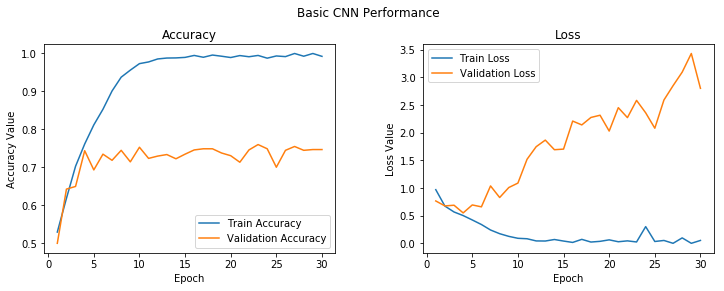

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [21]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 2916 samples, validate on 987 samples
Epoch 1/30
2916/2916 [==============================] - 35s 12ms/step - loss: 0.7402 - accuracy: 0.5099 - val_loss: 0.6926 - val_accuracy: 0.5086
Epoch 2/30
2916/2916 [==============================] - 38s 13ms/step - loss: 0.6947 - accuracy: 0.5192 - val_loss: 0.6882 - val_accuracy: 0.5866
Epoch 3/30
2916/2916 [==============================] - 36s 12ms/step - loss: 0.6757 - accuracy: 0.5957 - val_loss: 0.6487 - val_accuracy: 0.6687
Epoch 4/30
2916/2916 [==============================] - 35s 12ms/step - loss: 0.6476 - accuracy: 0.6475 - val_loss: 0.7078 - val_accuracy: 0.6028
Epoch 5/30
2916/2916 [==============================] - 34s 12ms/step - loss: 0.5841 - accuracy: 0.6979 - val_loss: 0.7193 - val_accuracy: 0.5988
Epoch 6/30
2916/2916 [==============================] - 34s 11ms/step - loss: 0.5452 - accuracy: 0.7236 - val_loss: 0.5179 - val_accuracy: 0.7487
Epoch 7/30
2916/2916 [==============================] - 34s 12ms/step - loss:

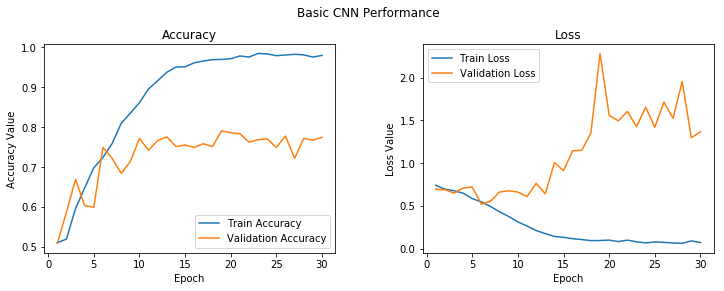

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [24]:
model.save('cats_dogs_basic_cnn.h5')